Epoch 1/100
12/12 [==============================] - 6s 129ms/step - loss: 0.1309 - val_loss: 0.0096
Epoch 2/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0213 - val_loss: 0.0187
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0148 - val_loss: 0.0122
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0127 - val_loss: 0.0098
Epoch 5/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0120 - val_loss: 0.0099
Epoch 6/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0115 - val_loss: 0.0094
Epoch 7/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0112 - val_loss: 0.0085
Epoch 8/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0113 - val_loss: 0.0104
Epoch 9/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0108 - val_loss: 0.0074
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0105 - val_loss: 0.008

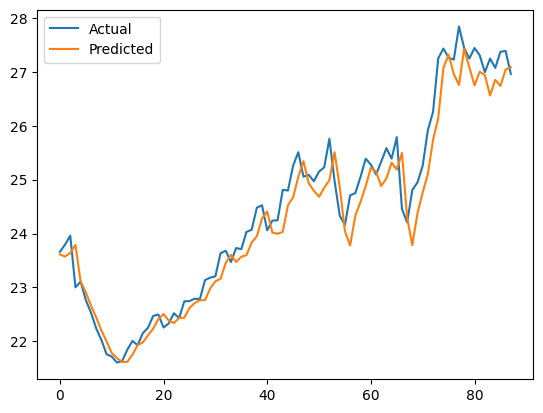

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
df = pd.read_csv("https://datatraining.site/data/GLE-PA-data.csv")

# Select the 'Close' column for prediction
data = df['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create a function to create sequences for the RNN model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        _x = data[i:(i + seq_length)]
        _y = data[i + seq_length]
        X.append(_x)
        y.append(_y)
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 10

# Create the sequences for training and testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions to get the original scale
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE:', rmse)

# Plot the actual vs. predicted values
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()